# Corner 개요
### 1. Harris Corner Detection
* 예제1. building 이미지에서 corner점 찾기
* 예제2. shape 이미지에서 corner점 찾기
* 예제3 ChessBoard 임지에서 코너점 찾기

### 2. Fast Feature Detector
* 예제1. building 이미지에서 corner점 찾기
* 예제2. ChessBoard 임지에서 코너점 찾기

### 3. ORB
* 예제 1. shape 이미지에서 corner 찾기
* 예제2. 종이박스상자들에서 코너점 찾기 및 매칭 시키기
* 예제3. 연구실 책상의 책과 실제 책 매칭하기

In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 1. Harris Corner Detection

### 예제 1. building.jpg에서 corner 찾기
### 1-1 cornerHarris 함수를 통해 coner의 범위를 찾기(float32 타입으로 uint8로 변환해야함)
* 향후 점 표시시 coner값이 90이 넘는가 등을 표현하기 위함

float32
(600, 868)
-0.005183762
0.010007294


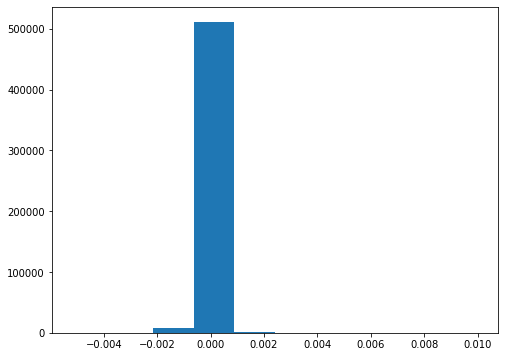

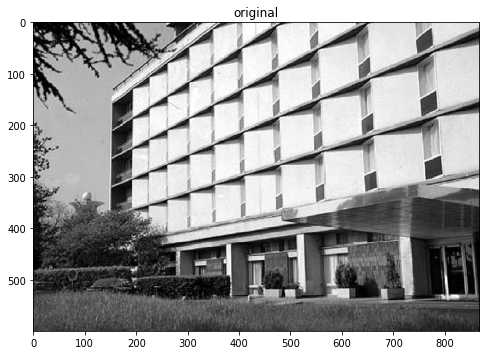

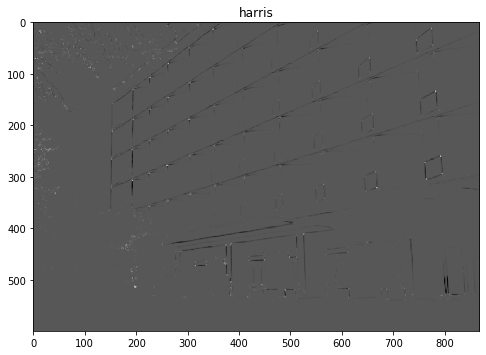

In [3]:
src = cv2.imread('./datas/building.jpg', cv2.IMREAD_GRAYSCALE)

# corner 찾기
harris = cv2.cornerHarris(src,
                          # 내 픽셀하나만 보고는 판단이 안되기에 3x3만큼 보고 코너인지 확인하겠다.
                          # 5라면 5x5, 너무많이 나오면 커널을 크게해나가면 된다.
                          3,
                          # 고주파 성분을 통해 코너를 찾아야하기에 소벨필터를 사용(수직, 수평)
                          3,
                          # 더 적게 주면 코너가 많이 생기고 더 세게 주면 코너가 덜 생긴다.
                          0.04)

# uint8이 아니네!!
print(harris.dtype)
print(harris.shape)

# corner의 범위 찾아내기
# 행렬을 600* 868을 보는건 의미 가 없기에 다음으로 정보를 파악하자
print(np.min(harris))
print(np.max(harris))

# revel은 1차원행렬로 만드는 것!
plt.hist(harris.ravel())
plt.show()
imshow("original", src)
imshow("harris",harris)


### 1-2 float32값인 코너 값들을 정규화 시키기

uint8


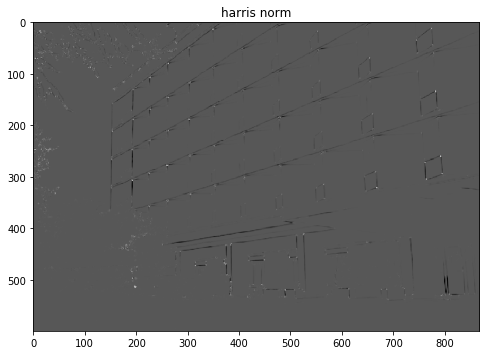

In [4]:
harris_norm = cv2.normalize(harris, None,
                            #0~ 255로 범위를 만들어주세요, minus를 최소값 max를 최대값으로 한 normailize 함수
                            0, 255, cv2.NORM_MINMAX,
                            # uint8로 바꾸는 것, opencv 타입
                            cv2.CV_8U)

print(harris_norm.dtype)
imshow("harris norm",harris_norm)

In [5]:
print(harris_norm.shape)
print(harris_norm.shape[0])
print(harris_norm.shape[1])
print(harris_norm[599][857])
print(harris_norm[599, 857])
# print(harris_norm[857][599])

(600, 868)
600
868
87
87


### 1-3 코너의 각도(여기서는 정확하는 각도느 아님) 및 이미지에 코너점 표기

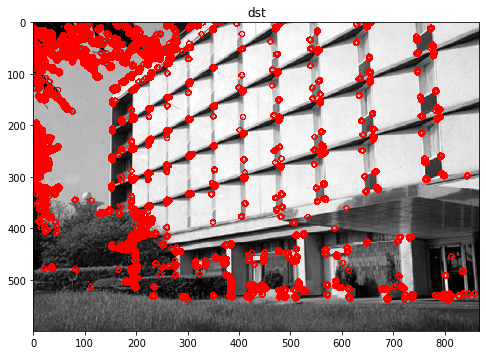

In [6]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for x in range(harris_norm.shape[0]):
    for y in range(harris_norm.shape[1]):
        # 각도가 90도 이상일 경우
        if harris_norm[x, y] > 90:
            # circle은 (열,행)인가보다?
            cv2.circle(dst, (y, x), 5, (0,0,255), 2)

imshow('dst', dst)            

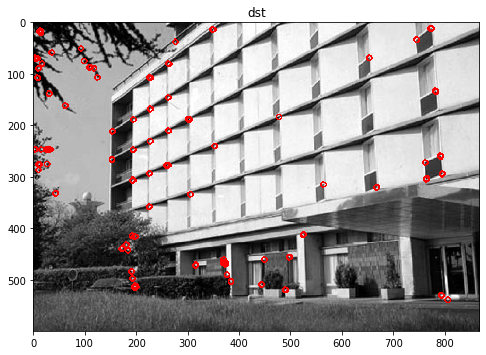

In [7]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for x in range(harris_norm.shape[0]):
    for y in range(harris_norm.shape[1]):
        # 각도가 128도 이상일 경우
        if harris_norm[x, y] > 128:
            # circle은 (열,행)인가보다?
            cv2.circle(dst, (y, x), 5, (0,0,255), 2)

imshow('dst', dst)            

### 예제 2. shape 이미지에서 corner 찾기

float32
uint8


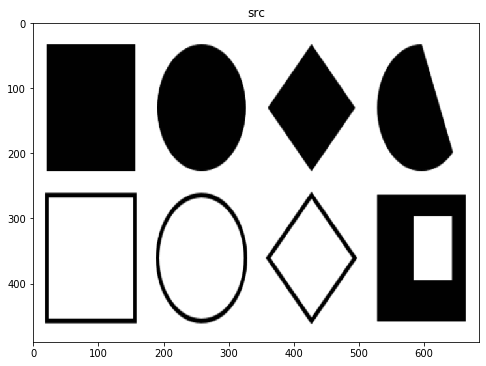

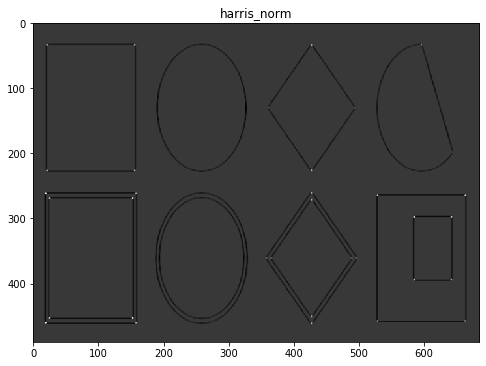

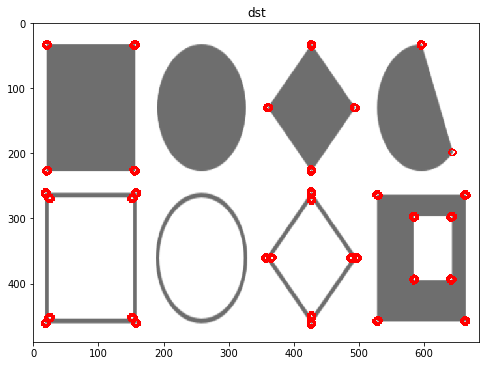

In [8]:
src = cv2.imread("./datas/corner.PNG", cv2.IMREAD_GRAYSCALE)

harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
print(harris_norm.dtype)

dst =cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for x in range(harris_norm.shape[0]):
    for y in range(harris_norm.shape[1]):
        if harris_norm[x, y] > 60 :
            cv2.circle(dst, (y, x), 5, (0,0,255), 2)
            
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

### 3. ChessBoard 이미지에서 코너점 찾기

float32


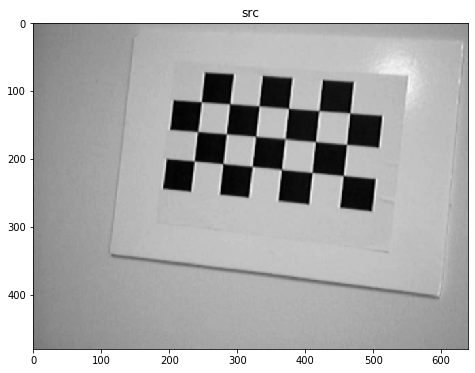

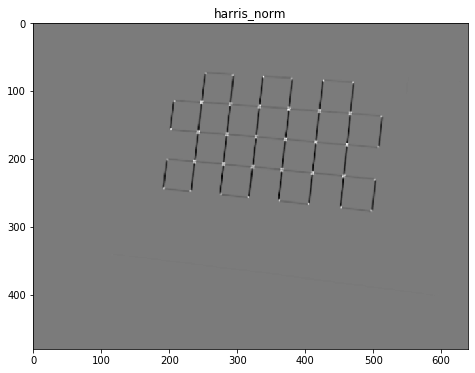

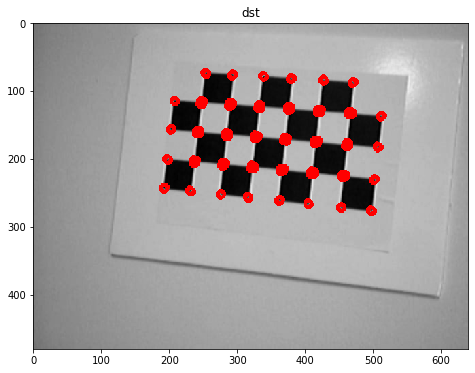

In [9]:
# 예제 3. ChessBoard.jpg에서 corner 찾기
src = cv2.imread('./datas/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for x in range(harris_norm.shape[0]):
        for y in range(harris_norm.shape[1]):
            if harris_norm[x, y] > 128:
                    cv2.circle(dst, (y, x), 5, (0, 0, 255), 2)
# 코너의 개수가 48개가 아니라 엄청 많다.
                    
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

float32


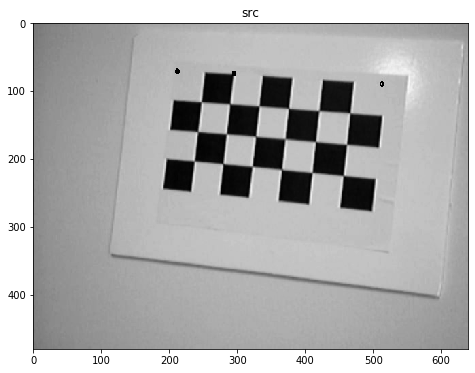

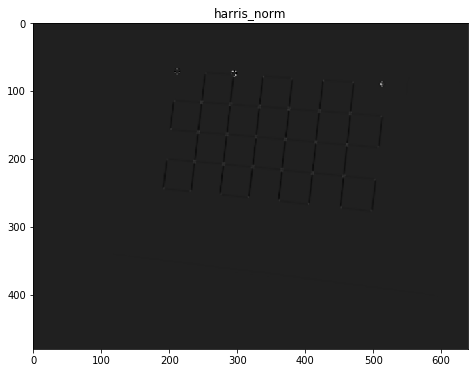

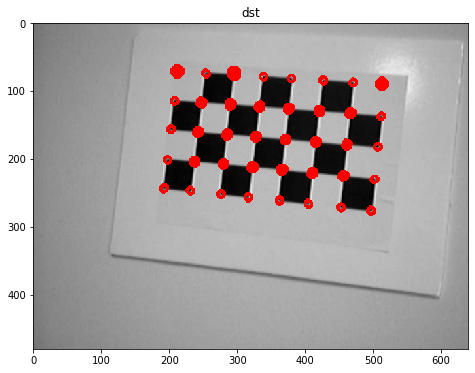

In [10]:
src = cv2.imread('./datas/chessBoard2.jpg', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 35:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

#### ※ 참고사항 : for문을 사용해 속도 저하를 막기 위해 numpy 연산 수행(권장)

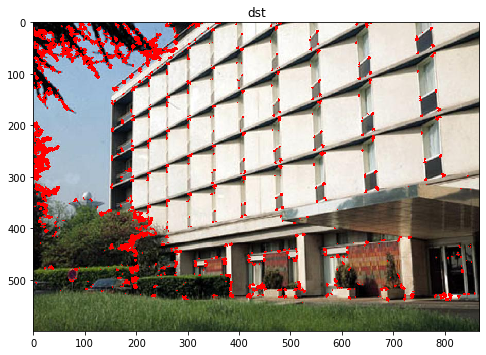

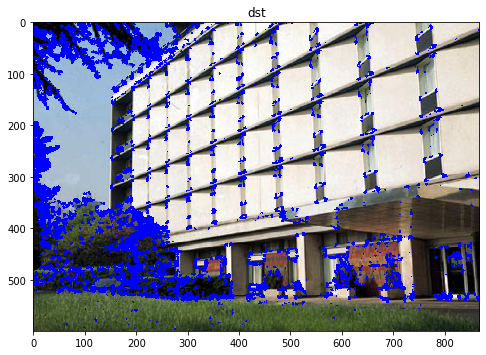

In [11]:
gray = cv2.imread("./datas/building.jpg",0)
img = cv2.imread("./datas/building.jpg")
dst = cv2.cornerHarris(gray, 5, 3, 0.04)

# max값의 1%만 thresold로 쓰겠다.
img[dst>0.01 * dst.max()] = [0,0,255]
imshow('dst', img)

img[dst> 0.001 * dst.max()] = [255, 0, 0]
imshow('dst', img)

## 2. Fast Feature Detector
* Harris Corner Detection 보다는 느리지만 20-30배 정도 빠르다.

### 예제 1. building.jpg에서 corner 찾기

851


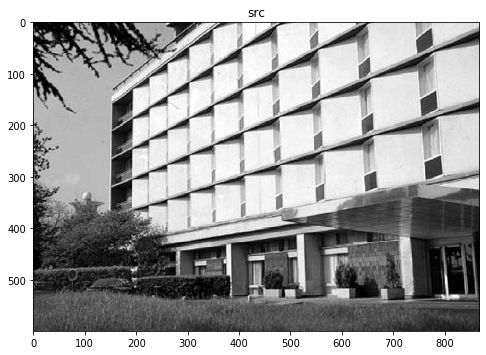

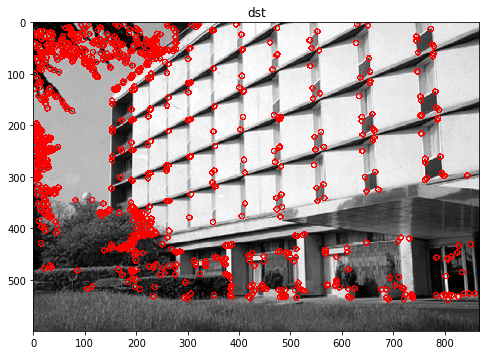

In [12]:
src = cv2.imread("./datas/building.jpg", cv2.IMREAD_GRAYSCALE)

#작아질수록 코너 많이 검출된다, 원에서도 검출되지만 중첩되서 검출될 수 있음
fast = cv2.FastFeatureDetector_create(50)
keypoints = fast.detect(src)

print(len(keypoints))
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

### 예제2. ChessBoard 임지에서 코너점 찾기

92
<KeyPoint 0000025D8E569060>
(254.0, 75.0)


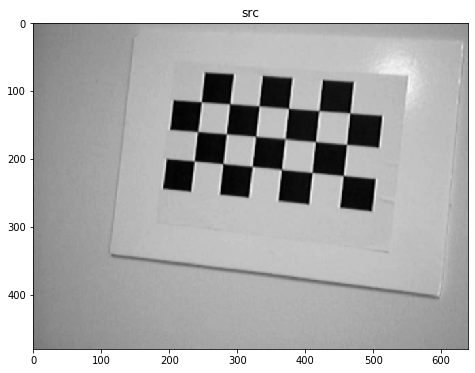

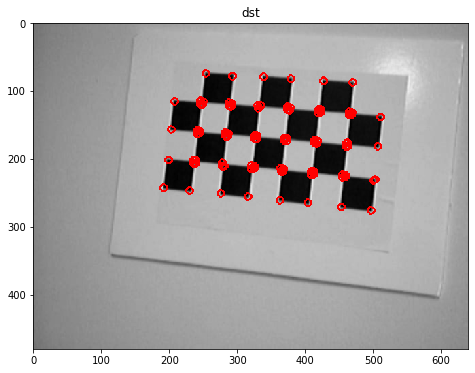

In [13]:
# harris code보다는 정확하지는 않지만 20-30배 정도 빠르다.
src = cv2.imread('./datas/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
# 특징점의 개수
keypoints = fast.detect(src)

print(len(keypoints))
print(keypoints[0]) # 첫번째 점
print(keypoints[0].pt) # 리턴값은 튜플이다.
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]
x, y = keypoints[0].pt # 튜플을 사용하는 이유, C가 아닌 파이썬에 더 적절한 표현

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2) # pt는 실수면 안된다. 무조건 정수여야만 한다.

imshow('src', src)
imshow('dst', dst)

(480, 640, 3)


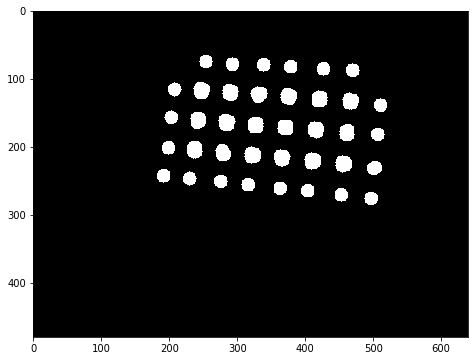

In [14]:
mask = np.zeros(dst.shape, dtype = "uint8")
print(mask.shape)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 10, (255, 255, 255), -1) # pt는 실수면 안된다. 무조건 정수여야만 한다.

# 안을 크게 채우는방법 1.


# 팽창을 통한 해결방법 2.
        
imshow("", mask)

# 3. ORB(SIFT, SURF 대체)

### 예제 1. shape 이미지에서 corner 찾기

len(keypoints): 187
desc.shape: (187, 32)


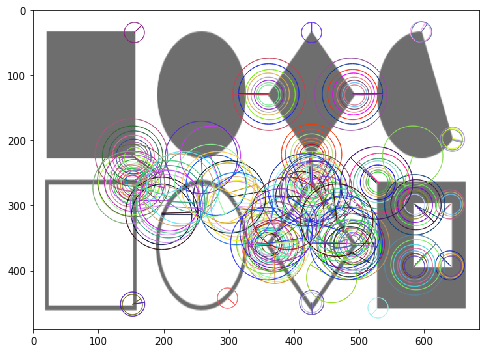

In [15]:
#src = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('./datas/corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)


print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)


dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst) 
#원이 엄청 많은건 코너점이 많은 것이다.

## 예제2. 종이박스상자들에서 코너점 찾기 및 매칭 시키기

#### 3.1 코너점 찾기

desc1.shape :  (453, 32)
desc2.shape :  (500, 32)


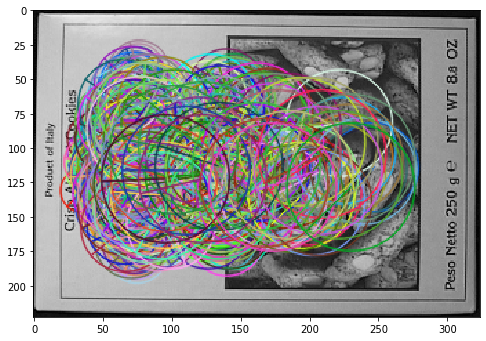

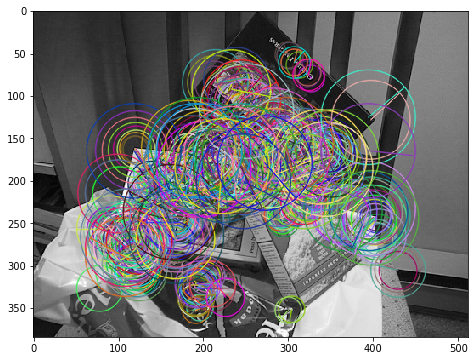

In [16]:
# SURF나 SIFT는 32byte를 모두 다 비교하기 때문에 시간이 오래 걸린다.

src1 = cv2.imread("./datas/box.png", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./datas/box_in_scene.png", cv2.IMREAD_GRAYSCALE)

# rich corner라고도 한다. 풍부한 정보가 담긴 corner
orb = cv2.ORB_create()
# keypoint 위치 정보 있다. 
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape : ', desc1.shape)
print('desc2.shape : ', desc2.shape)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

In [17]:
print(keypoints1[171].pt)
print(desc1[171])

print(keypoints2[171].pt)
print(desc2[171])
# 이 두개의 점들의 위치 거리를 쟤어야한다.

(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254 174 116  93 250
 190 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]


### 3-2 이미지 매칭
* 방법1. 매칭 시 sort 함수 사용
* 방법2 : 매칭 시 BruteForceMatfch 함수

#### 방법1 : 매칭 시 sort 함수 사용

453
<DMatch 0000025D8ECC7290>
0
487
87.0
queryIdx :  0
queryIdx :  0
trainIdx :  487
0 - 487 --> 87.0
queryIdx :  1
queryIdx :  1
trainIdx :  304
1 - 304 --> 70.0
queryIdx :  2
queryIdx :  2
trainIdx :  378
2 - 378 --> 78.0
queryIdx :  3
queryIdx :  3
trainIdx :  85
3 - 85 --> 86.0
queryIdx :  4
queryIdx :  4
trainIdx :  126
4 - 126 --> 80.0
queryIdx :  5
queryIdx :  5
trainIdx :  318
5 - 318 --> 77.0
queryIdx :  6
queryIdx :  6
trainIdx :  65
6 - 65 --> 81.0
queryIdx :  7
queryIdx :  7
trainIdx :  90
7 - 90 --> 65.0
queryIdx :  8
queryIdx :  8
trainIdx :  474
8 - 474 --> 74.0
queryIdx :  9
queryIdx :  9
trainIdx :  416
9 - 416 --> 77.0
queryIdx :  10
queryIdx :  10
trainIdx :  163
10 - 163 --> 82.0
queryIdx :  11
queryIdx :  11
trainIdx :  488
11 - 488 --> 75.0
queryIdx :  12
queryIdx :  12
trainIdx :  449
12 - 449 --> 74.0
queryIdx :  13
queryIdx :  13
trainIdx :  29
13 - 29 --> 77.0
queryIdx :  14
queryIdx :  14
trainIdx :  20
14 - 20 --> 79.0
queryIdx :  15
queryIdx :  15
trainIdx 

queryIdx :  255
queryIdx :  255
trainIdx :  32
255 - 32 --> 72.0
queryIdx :  256
queryIdx :  256
trainIdx :  439
256 - 439 --> 79.0
queryIdx :  257
queryIdx :  257
trainIdx :  415
257 - 415 --> 77.0
queryIdx :  258
queryIdx :  258
trainIdx :  303
258 - 303 --> 86.0
queryIdx :  259
queryIdx :  259
trainIdx :  296
259 - 296 --> 82.0
queryIdx :  260
queryIdx :  260
trainIdx :  300
260 - 300 --> 73.0
queryIdx :  261
queryIdx :  261
trainIdx :  234
261 - 234 --> 71.0
queryIdx :  262
queryIdx :  262
trainIdx :  165
262 - 165 --> 74.0
queryIdx :  263
queryIdx :  263
trainIdx :  65
263 - 65 --> 84.0
queryIdx :  264
queryIdx :  264
trainIdx :  416
264 - 416 --> 89.0
queryIdx :  265
queryIdx :  265
trainIdx :  218
265 - 218 --> 83.0
queryIdx :  266
queryIdx :  266
trainIdx :  66
266 - 66 --> 69.0
queryIdx :  267
queryIdx :  267
trainIdx :  46
267 - 46 --> 83.0
queryIdx :  268
queryIdx :  268
trainIdx :  388
268 - 388 --> 76.0
queryIdx :  269
queryIdx :  269
trainIdx :  422
269 - 422 --> 81.0
que

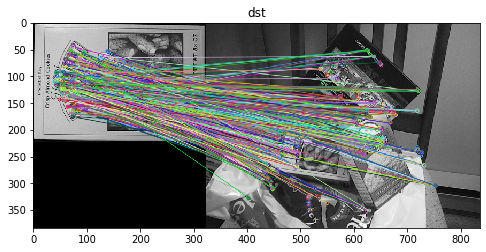

True

In [18]:
# 무식하게 bruteforce alg로 한다.
# 거리를 어떻게 젤꺼냐 32차원이다!! -> Hamming distance(고속으로 측정, 유클리디안 너무 오래걸림)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

# 453개는 desc1.shape에서 나왔다. 양쪽 중 작은 값으로 매핑
# 몇번째 점과 몇번째 점이 같은점인지 아는 것이 중요하다.
print(len(matches)) 

print(matches[0])
print(matches[0].queryIdx) # desc1의 0번째와
print(matches[0].trainIdx) # desc2의 487번째는 
print(matches[0].distance) # 86만큼 떨어져있다. 0이 가장 이상적이다.


for m in matches: 
    print("queryIdx : ",m.queryIdx)
    print("queryIdx : ",m.queryIdx)
    print("trainIdx : ",m.trainIdx)
    print(f"{m.queryIdx} - {m.trainIdx} --> {m.distance}")

#첫번째 이미지에서의 첫번째 코너의 물리적인 좌표
# 이 둘이 일치한다고 하는데 왜 일치하는거지? (다차원이라??)
print(keypoints1[matches[0].queryIdx].pt)  
print(keypoints2[matches[0].trainIdx].pt)

matches = sorted(matches, key=lambda x: x.distance)

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)

imshow('dst', dst)
cv2.imwrite("out2.png", dst)
# 너무 많이 나오기에 keypoint를 줄여버린다.

#### 방법2 : 매칭 시 BruteForceMatfch 함수

desc1.shape :  (453, 32)
desc2.shape :  (500, 32)


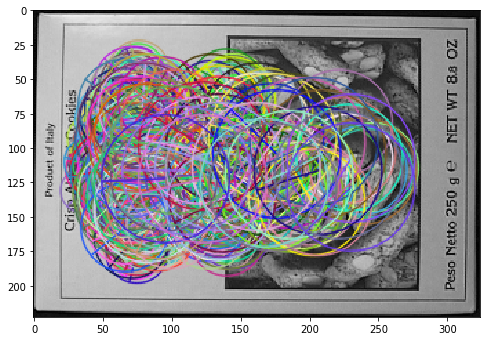

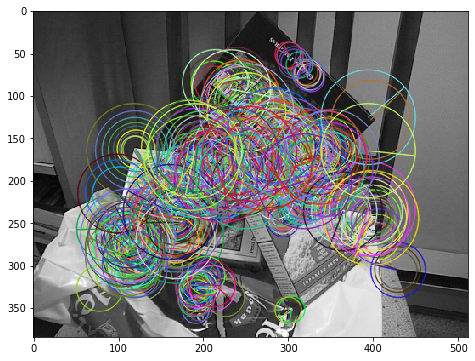

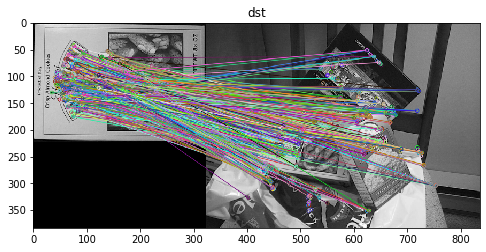

True

In [19]:
src1 = cv2.imread("./datas/box.png", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./datas/box_in_scene.png", cv2.IMREAD_GRAYSCALE)

# rich corner라고도 한다. 풍부한 정보가 담긴 corner
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape : ', desc1.shape)
print('desc2.shape : ', desc2.shape)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

# 무식하게 bruteforce alg로 한다.
# 거리를 어떻게 젤꺼냐 32차원이다!! -> Hamming distance(고속으로 측정, 유클리디안 너무 오래걸림)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING) 
matches = matcher.match(desc1, desc2)

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)

imshow('dst', dst)
cv2.imwrite("out3.png", dst)

#### 연결되는 점이 너무 많아서 가장 코너점이 좋은 부분 20개만 선정하여 표현

desc1.shape :  (453, 32)
desc2.shape :  (500, 32)


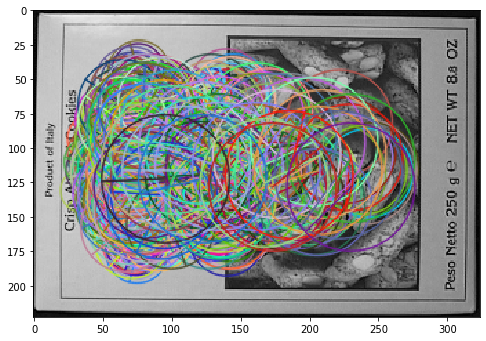

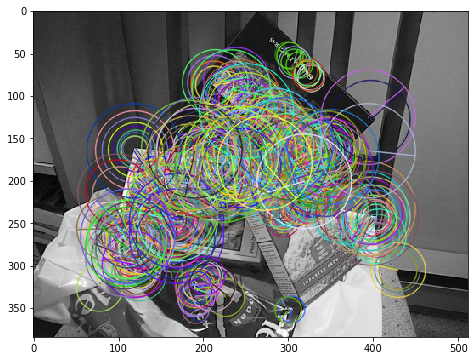

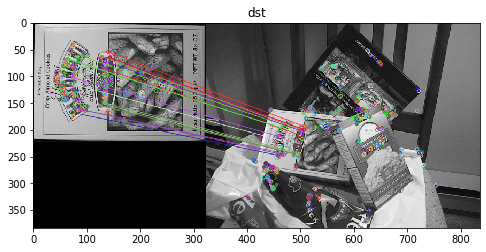

True

In [20]:
# SURF나 SIFT는 32byte를 모두 다 비교하기 때문에 시간이 오래 걸린다.

src1 = cv2.imread("./datas/box.png", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./datas/box_in_scene.png", cv2.IMREAD_GRAYSCALE)

# rich corner라고도 한다. 풍부한 정보가 담긴 corner
orb = cv2.ORB_create()
# keypoint 위치 정보 있다. 
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape : ', desc1.shape)
print('desc2.shape : ', desc2.shape)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

# 이 두개의 점들의 위치 거리를 쟤어야한다.

# 무식하게 bruteforce alg로 한다.
# 거리를 어떻게 젤꺼냐 32차원이다!! -> Hamming distance(고속으로 측정, 유클리디안 너무 오래걸림)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst', dst2)
cv2.imwrite("out2.png", dst2)
# 너무 많이 나오기에 keypoint를 줄여버린다.

### 예제3. 연구실 책상의 책과 실제 책 매칭하기

desc1.shape :  (426, 32)
desc2.shape :  (500, 32)


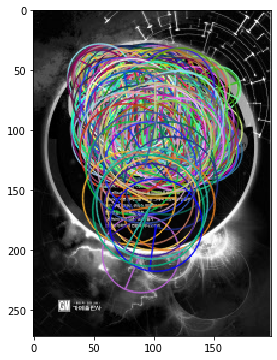

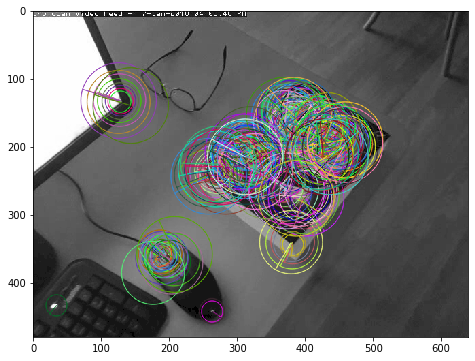

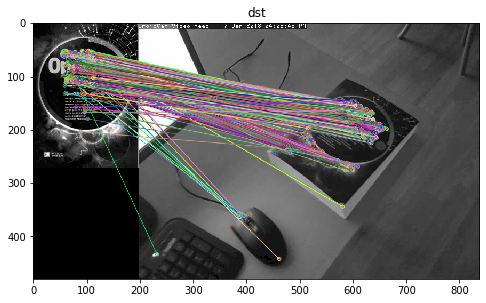

True

In [21]:
src1 = cv2.imread("./datas/book3.jpg", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./datas/book3_1.jpg", cv2.IMREAD_GRAYSCALE)

# rich corner라고도 한다. 풍부한 정보가 담긴 corner
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape : ', desc1.shape)
print('desc2.shape : ', desc2.shape)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

# 무식하게 bruteforce alg로 한다.
# 거리를 어떻게 젤꺼냐 32차원이다!! -> Hamming distance(고속으로 측정, 유클리디안 너무 오래걸림)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING) 
matches = matcher.match(desc1, desc2)

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)

imshow('dst', dst)
cv2.imwrite("out3.png", dst)

#### 코너점이 많아서 좋은 코너점 20개만 추출

desc1.shape :  (426, 32)
desc2.shape :  (500, 32)


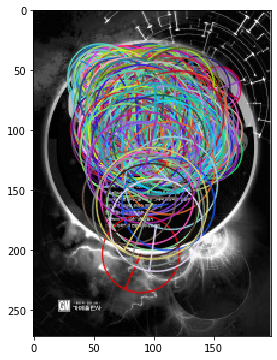

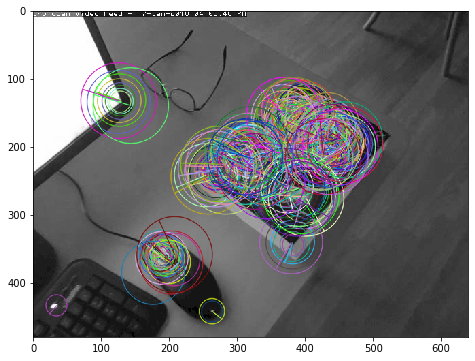

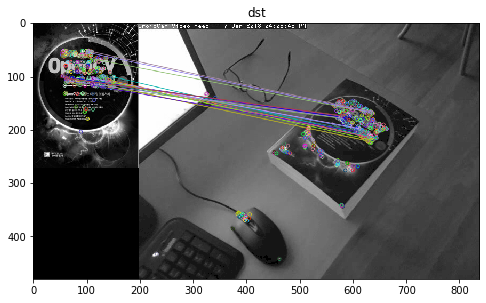

True

In [22]:
# SURF나 SIFT는 32byte를 모두 다 비교하기 때문에 시간이 오래 걸린다.

src1 = cv2.imread("./datas/book3.jpg", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./datas/book3_1.jpg", cv2.IMREAD_GRAYSCALE)

# rich corner라고도 한다. 풍부한 정보가 담긴 corner
orb = cv2.ORB_create()
# keypoint 위치 정보 있다. 
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape : ', desc1.shape)
print('desc2.shape : ', desc2.shape)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

# 이 두개의 점들의 위치 거리를 쟤어야한다.

# 무식하게 bruteforce alg로 한다.
# 거리를 어떻게 젤꺼냐 32차원이다!! -> Hamming distance(고속으로 측정, 유클리디안 너무 오래걸림)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst', dst2)
cv2.imwrite("out2.png", dst2)
# 너무 많이 나오기에 keypoint를 줄여버린다.

#### 간단 정리

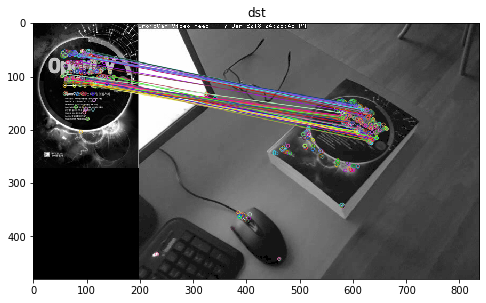

True

In [23]:
# 암기 필요!!

src1 = cv2.imread("./datas/book3.jpg", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./datas/book3_1.jpg", cv2.IMREAD_GRAYSCALE)

# rich 코너라는 컨셉 
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst', dst2)
cv2.imwrite("out2.png", dst2)